# Sources
# API/QAQC not set up

Census Tracts - https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2015&layergroup=Census+Tracts (Need 2015 to align with Places)

In [1]:
### Import Libraries

# File manipulation

import os # For working with Operating System
from sys import platform # Diagnose operating system
import urllib # For accessing websites
import zipfile # For extracting from Zipfiles
from io import BytesIO # For reading bytes objects
import requests

# Analysis

import numpy as np # For working with Arrays
import pandas as pd # Data Manipulation
import geopandas as gpd # Spatial Data Manipulation

# Visualization

from pprint import pprint # Pretty Printing
import matplotlib.pyplot as plt # Basic Plotting
import contextily # Base Map Visualization
import warnings

warnings.filterwarnings('ignore') # Ignores some warnings

In [2]:
### Definitions

datapath = os.path.join('..', '..', 'Data')

mpls_boundary = gpd.read_file(os.path.join(datapath, 'mpls_boundary.geojson'))

In [3]:
# Download and unzip the shapefiles for your state here:
# https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2015&layergroup=Census+Tracts

path = os.path.join(datapath, 'tl_2015_27_tract', 'tl_2015_27_tract.shp')

tracts = gpd.read_file(path).to_crs('EPSG:26915')

<Axes: >

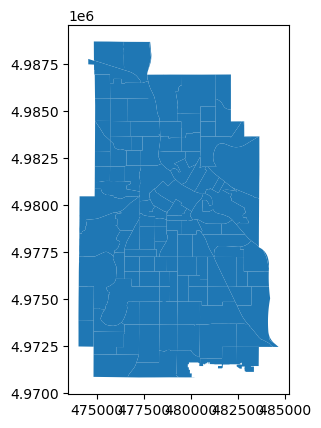

In [4]:
# Clip to study area

mpls_tracts = gpd.clip(tracts, mpls_boundary)

mpls_tracts.plot()

In [5]:
mpls_tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 145 entries, 644 to 547
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   145 non-null    object  
 1   COUNTYFP  145 non-null    object  
 2   TRACTCE   145 non-null    object  
 3   GEOID     145 non-null    object  
 4   NAME      145 non-null    object  
 5   NAMELSAD  145 non-null    object  
 6   MTFCC     145 non-null    object  
 7   FUNCSTAT  145 non-null    object  
 8   ALAND     145 non-null    int64   
 9   AWATER    145 non-null    int64   
 10  INTPTLAT  145 non-null    object  
 11  INTPTLON  145 non-null    object  
 12  geometry  145 non-null    geometry
dtypes: geometry(1), int64(2), object(10)
memory usage: 15.9+ KB


<Axes: >

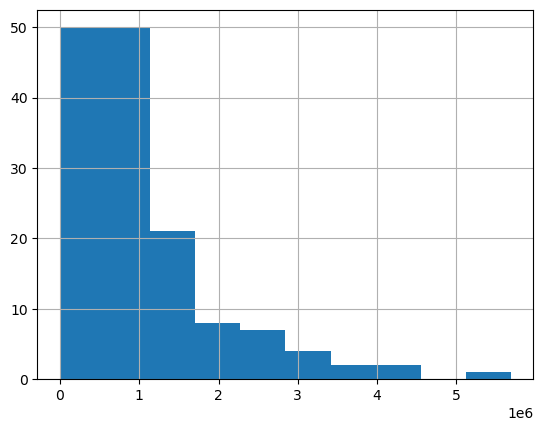

In [6]:
# I don't believe the clip was good...

mpls_tracts.area.hist()

In [7]:
# Yup, some of those areas are way small

<Axes: >

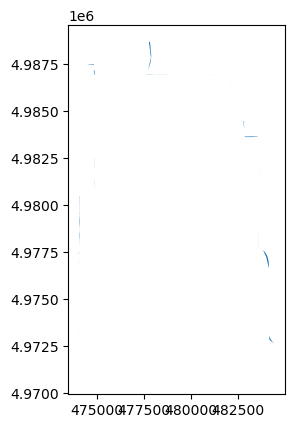

In [8]:
# Remove any leftover tracts that were accidentally included in clip
# So like tracts that are less than half a square kilometer
# 500^2 = 250,000

mpls_tracts[mpls_tracts.area<250000].plot()

In [9]:
# Hopefully none of those are actual minneapolis census tracts...

mpls_tracts = mpls_tracts[mpls_tracts.area>250000]

In [10]:
mpls_tracts.area.min()

269472.04641691165

<Axes: >

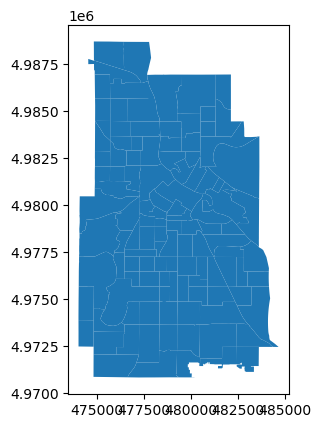

In [11]:
mpls_tracts.plot()

In [12]:
# Save

mpls_tracts.to_file(os.path.join(datapath, 'mpls_tracts.geojson'))